In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [58]:
for i in range(len(logins)):
    logins.iloc[i] = logins.iloc[i][0].round('15T')

In [59]:
time_series = logins.login_time.value_counts()

In [131]:
time_series = time_series.sort_index()
time_series['1970-01-02'].head()

1970-01-02 00:00:00    13
1970-01-02 00:15:00    13
1970-01-02 00:30:00    14
1970-01-02 00:45:00    14
1970-01-02 01:00:00    10
Name: login_time, dtype: int64

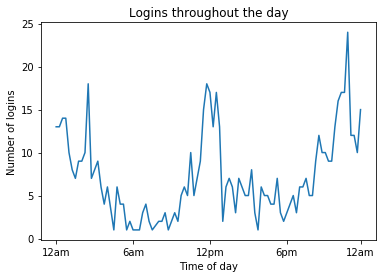

In [133]:
plt.plot(time_series['1970-01-02'])
plt.xticks(['1970-01-02 00:00:00','1970-01-02 06:00:00','1970-01-02 12:00:00','1970-01-02 18:00:00','1970-01-02 23:45:00'],
          ['12am', '6am', '12pm','6pm','12am'])
plt.title('Logins throughout the day')
plt.xlabel('Time of day')
plt.ylabel('Number of logins')
plt.show()

It looks like on a daily basis there are peaks in usage around lunchtime (12:00:00) and late at night (10pm) or early morning (3am). This suggests to me that the average user has a job or school which would occupy most of their time after 6am, have a lunch break at noon to login and then be occupied again until late in the evening. It would be interesting to look at this data not just by day.

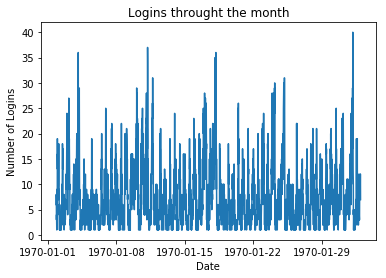

In [136]:
plt.plot(time_series['1970-01-01':'1970-02-01'])
plt.title('Logins throught the month')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.show()

Based on a plot throughout a month is seems there are certain points in the month that typically see a spike in users. We'll want to look at weekly data to get a better idea of what this could be. We expect that it correlates to the previous hypothesis of working adults/students and this cyclical peak is the weekend.

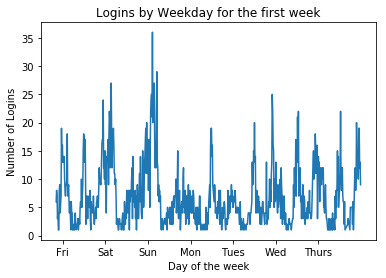

In [137]:
plt.plot(time_series['1970-01-01':'1970-01-08'])
plt.xticks(['1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08'],
          ['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'])
plt.title('Logins by Weekday for the first week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Logins')
plt.show()

As expected the highest peaks over a week correspond to the weekend. We found the day of the week using a search for the weekday of 1970-01-02 and extrapolated the rest of the week from that point. 